<a href="https://colab.research.google.com/github/kevinegan31/Udemy_Machnine_Learning_A-Z/blob/main/Python/Clustering/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
# We keep Annual Income and spending score to identify our clusters in 2D
X = dataset.iloc[:, [3, 4]].values

## Using the elbow method to find the optimal number of clusters

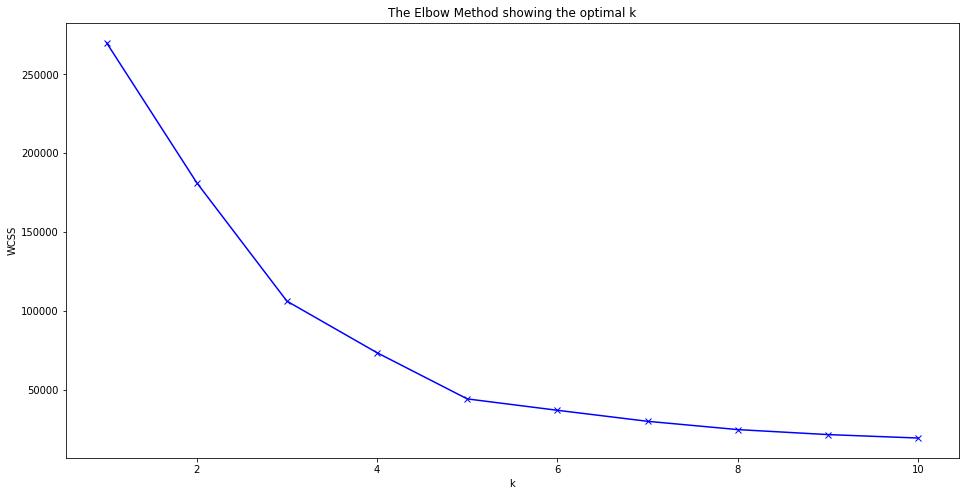

In [23]:
'''
Create variables using clustering 
that has several new variables to describe spending score.
'''
from sklearn.cluster import KMeans
wcss = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)
# Plot the data
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [25]:
### Automatically determine optimal cluster
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), wcss, curve="convex", direction="decreasing"
    )
kl.elbow

5

## Training the K-Means model on the dataset

In [30]:
kmeans = KMeans(n_clusters=kl.elbow, init='k-means++', random_state=42)
# Returns dependent variable from clustering
y_means = kmeans.fit_predict(X)
print(y_means)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

<function matplotlib.pyplot.show(*args, **kw)>

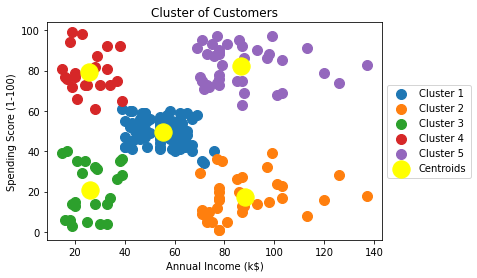

In [50]:
# cluster = 0
plt.scatter(X[y_means==0,0],X[y_means==0,1], s = 100, label = "Cluster 1")
# cluster = 1
plt.scatter(X[y_means==1,0],X[y_means==1,1], s = 100, label = "Cluster 2")
# cluster = 2
plt.scatter(X[y_means==2,0],X[y_means==2,1], s = 100, label = "Cluster 3")
# cluster = 3
plt.scatter(X[y_means==3,0],X[y_means==3,1], s = 100, label = "Cluster 4")
# cluster = 4
plt.scatter(X[y_means==4,0],X[y_means==4,1], s = 100, label = "Cluster 5")
# Add cluster centers
# 0 corresponds to x coordinates of cluster centers
# 1 corresponds to y coordinates of cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show